Installing dependencies

In [3]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

### PyTorch and fastai: A Winning Combination
- Why pytorch and fastai?
  - fast.ai's extensive experience with various machine learning packages and languages.
  - After rigorous testing, fast.ai adopted PyTorch due to its flexibility, speed, and expressiveness.
  - PyTorch's rapid growth in usage and adoption in research indicates its industry relevance and efficacy.
  - fastai builds on PyTorch, providing high-level functionality and a layered software architecture.
  - Version 2 of fastai offers unique features and a comprehensive rewrite for improved usability.
  
- **Software Flexibility and Learning Focus**
  - Learning a specific library is secondary; understanding deep learning foundations is paramount.
  - Transitioning between libraries is quick, focusing on proper understanding of concepts.
  - Emphasis on code clarity: high-level fastai for conceptual learning, low-level PyTorch for foundational understanding.
  
- **Adapting to Rapid Changes**
  - Expect rapid evolution in deep learning libraries and technologies.
  - Emphasize learning underlying techniques and quickly adapting to new tools and methods.
  
- **Deep Dive into Implementation**
  - The book provides insight into fastai and PyTorch code implementation at each level.
  - Enables understanding of best practices and implementation details for future framework transitions.
  
- **Jupyter: The Ultimate Experimentation Platform**
  - Jupyter Notebook is the preferred platform for experimentation and data science.
  - Enables easy model training, experimentation, and introspection of data preprocessing and model development pipeline.
  - Powerful, flexible, and widely used for its ease of use.


### What Is a Neural Network?
- **Neural Network Overview:**
  - Neural networks are highly flexible models capable of solving a wide range of problems by adjusting their weights.
  - They serve as a mathematical function that can be adapted to any task, theoretically demonstrated by the universal approximation theorem.
  - Stochastic gradient descent (SGD) provides a general method for updating neural network weights automatically to improve performance.
  - SGD and neural networks primarily rely on addition and multiplication for computation, making them accessible to understand.

- **Understanding Neural Networks:**
  - Inputs: Images in image classification tasks.
  - Weights: Parameters within the neural network.
  - Model: The neural network itself.
  - Outputs: Predictions generated by the neural network, such as "dog" or "cat".
  - Evaluating Performance: Done by measuring accuracy in predicting correct answers.
  
- **Deep Learning Jargon:**
  - Architecture: The functional form of the model.
  - Parameters: The weights of the neural network.
  - Predictions: Calculated results from the independent variable (data without labels).
  - Loss: Measure of performance, dependent on both predictions and correct labels.
  - Targets: Correct labels or dependent variables.


### Limitations Inherent To Machine Learning
- **Fundamental Points about Training a Deep Learning Model:**
  - A model relies on data for its creation.
  - It can only learn from patterns present in the input data used for training.
  - Deep learning models generate predictions, not recommendations for actions.
  - Labeled data is essential for training models effectively.
- **Importance of Labeled Data:**
  - Organizations often lack labeled data rather than raw data.
  - Labeling approaches are crucial for practical machine learning applications.
- **Gap between Organizational Goals and Model Capabilities:**
  - Machine learning models predict based on existing data, potentially failing to suggest new or unknown items.
  - Example: Recommendation systems may suggest items a user already has or knows about, rather than novel suggestions.
- **Feedback Loops and Biases in Machine Learning Models:**
  - Predictive models based on biased data can reinforce existing biases.
  - Example: Predictive policing models may reflect biases in past arrests, leading to further biased policing.
  - Feedback loops in commercial settings, like biased video recommendation systems, can exacerbate biases.
- **Ethical Considerations:**
  - Biased recommendation systems can have ethical implications, influencing user behavior and perpetuating biases.
  - Detailed exploration of ethical implications is important in data science and machine learning discussions.

### Image Recognition with fast.ai

- **Importing Libraries**
  * `from fastai.vision.all import *`: Imports the entire fast.ai library for computer vision tasks. (Note: Using `*` is generally not recommended for large projects due to potential conflicts.)

- **Data Download and Path**

  * `path = untar_data(URLs.PETS)/'images'`: Downloads the PETS dataset from fast.ai, extracts it, and creates a Path object pointing to the image folder. (Path objects simplify file and directory access.)

- **Image Labeling Function**

  * `def is_cat(x): return x[0].isupper()`: This function determines if an image is a cat based on the filename (uppercase starts the filename for cats).

- **DataLoaders**

  * `dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))`: 
      * This line creates an ImageDataLoaders object specifying various aspects of the data:
          * Path to the image folder.
          * Function to get image files.
          * Percentage of data for validation (20% in this case).
          * Random seed for reproducibility (set to 42).
          * Function to label images (`is_cat`).
          * Transformation to resize images to 224x224 pixels (applied to each image).

- **Validation Set**

  * 20% of the data is reserved for validation and not used for training. 
      * This helps prevent overfitting (model memorizing training data instead of learning general patterns).

- **Training and Overfitting**
  * `learn = vision_learner(dls, resnet34, metrics=error_rate)`: Creates a convolutional neural network (CNN) learner using:
          * The data loaders (`dls`).
          * The ResNet34 architecture (a pre-trained model).
          * Error rate metric to track performance.
      * Overfitting is a common challenge where the model performs well on training data but poorly on unseen data.

- **Pre-trained Models**

  * Using pre-trained models significantly improves training speed and accuracy, especially with limited data.
  * Fast.ai automatically removes the last layer (specific to the original training task) and adds new layers for the current task (transfer learning).

- **Fine-tuning**
  * `learn.fine_tune(1)`: Fine-tunes the pre-trained model for the new task (cat/dog classification) by:
          * Training just the new layers for one epoch.
          * Training the entire model for one epoch with a focus on updating the later layers (especially the new head).

- **Epoch**
  * One complete pass through the entire dataset for training.

By following these steps, the model learns to distinguish between cats and dogs based on the image data.



### What does the image recogniser learnt?
- **Understanding Deep Learning Models:**
  - Deep learning models are often perceived as "black box" models, but extensive research exists to deeply inspect and understand them.
  - Models, including deep learning and traditional statistical ones, can be challenging to fully comprehend, especially concerning their behavior with new data.
  - Research has shown methods to visualize neural network weights and gain insights from them.

- **Visualization of Convolutional Networks:**
  - In 2013, Matt Zeiler and Rob Fergus published a paper on "Visualizing and Understanding Convolutional Networks."
  - They analyzed the model that won the 2012 ImageNet competition and improved it significantly based on their findings, leading to winning the 2013 competition.
  - The first layer of a CNN detects diagonal, horizontal, and vertical edges, along with gradients, resembling basic visual processing in the human eye and pre-deep learning computer vision features.

- **Layer Activations:**
  - **First Layer:**
    - 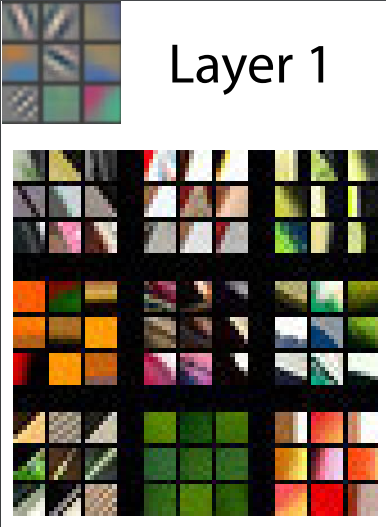
    - Model discovers basic features like edges and gradients.
    - Building blocks are similar to human visual processing and pre-deep learning computer vision features.
  - **Second Layer:**
    - 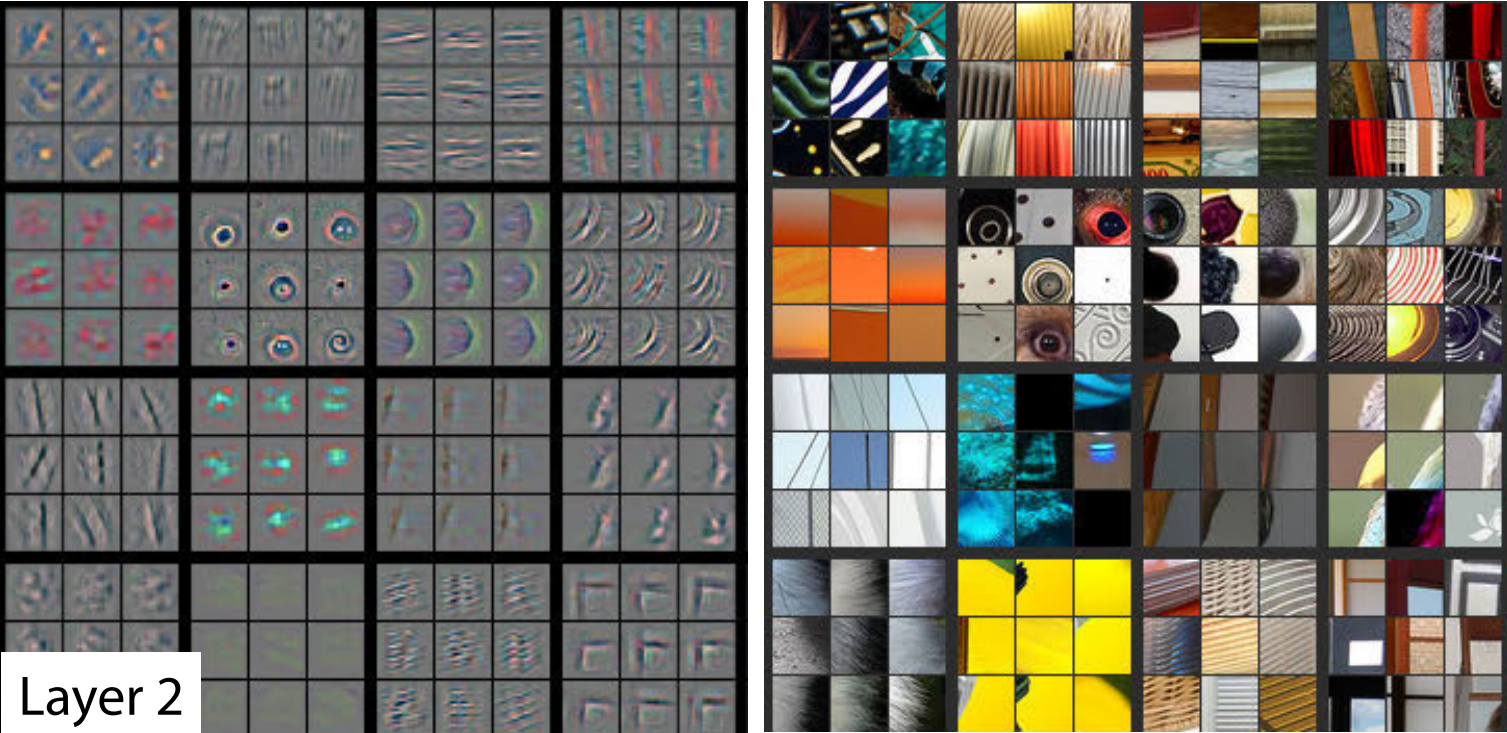
    - Features detectors for corners, repeating lines, circles, and other simple patterns.
    - Built upon basic features from the first layer.
  - **Third Layer:**
    - 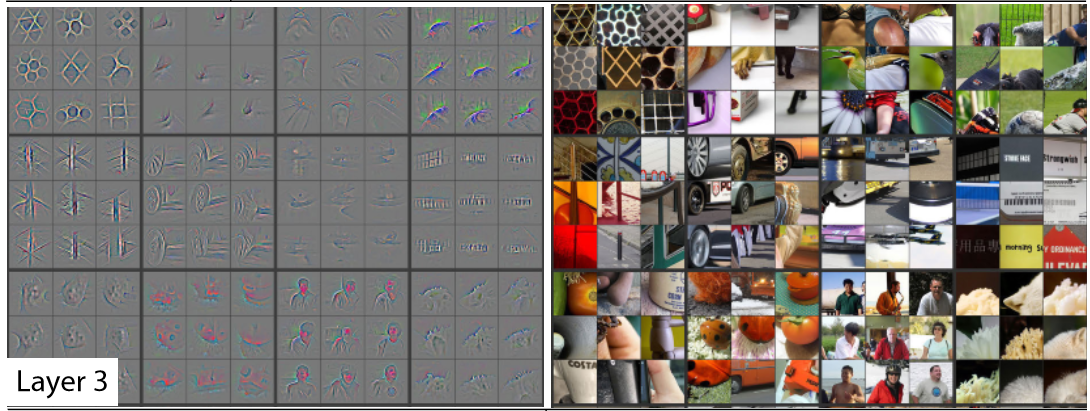
    - Identifies higher-level semantic components like car wheels, text, and flower petals.
  - **Fourth and Fifth Layers:**
    - 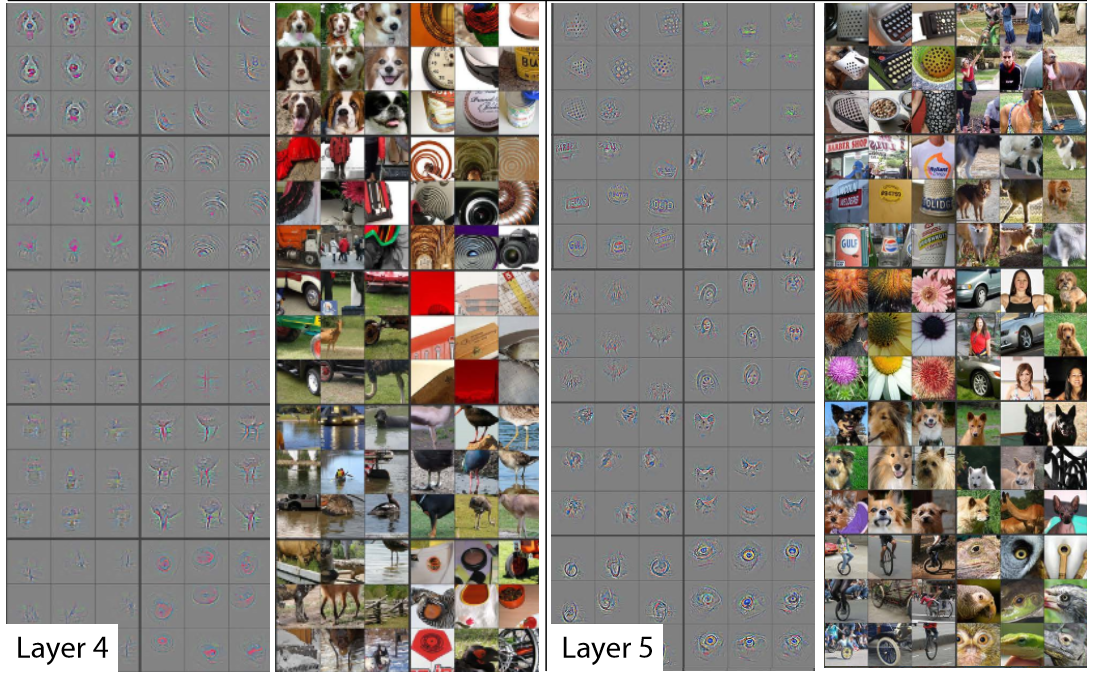
    - Can identify even higher-level concepts beyond basic features.

- **Model Evolution:**
  - Older models like AlexNet had five layers, while newer ones can have hundreds, producing richer features.
  - Pretrained models can be fine-tuned for specific tasks, adapting the focus of the last layers.

- **Adapting Pretrained Models:**
  - Pretrained models can be specialized for various tasks, such as distinguishing cats versus dogs.


### Tackling Non-Image Tasks

- An image recognizer can be versatile and used for various tasks by representing data as images.
- Fast.ai student Ethan Sutin improved the accuracy of environmental sound detection by converting sound to spectrograms, beating state-of-the-art models. [link to github](https://github.com/etown/dl1/blob/master/UrbanSoundClassification.ipynb)
    - 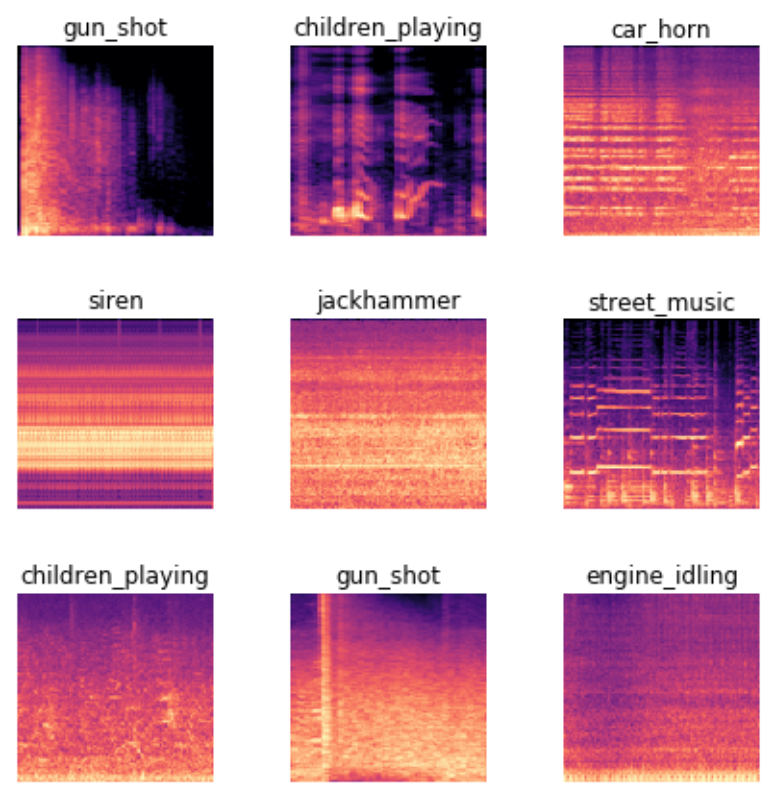
- Time series data can be converted into images for better representation, highlighting components like seasonality and anomalies.
- Ignacio Oguiza achieved over 90% accuracy in olive oil classification by converting time series data using Gramian Angular Difference Field (GADF) and feeding images to an image classification model. [link to github](https://gist.github.com/oguiza/c9c373aec07b96047d1ba484f23b7b47)
    - 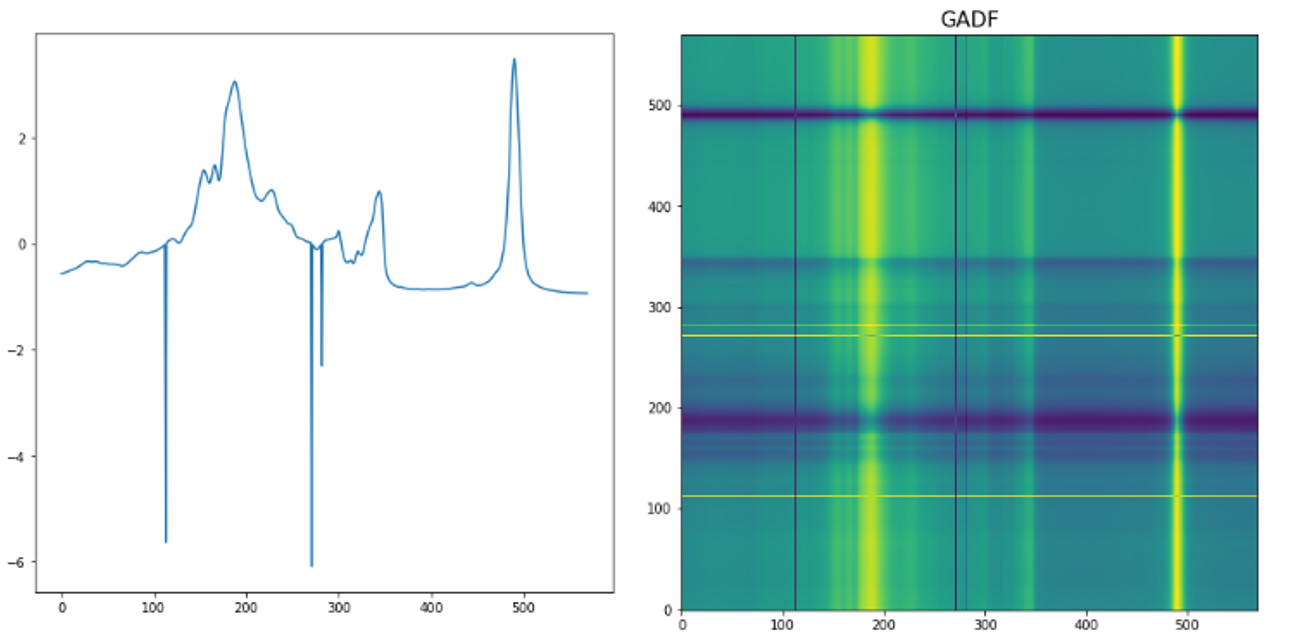
- Gleb Esman's fraud detection project used mouse movement and click data, converted into images for recognition, leading to a patent. [link to blog](https://www.splunk.com/en_us/blog/security/deep-learning-with-splunk-and-tensorflow-for-security-catching-the-fraudster-in-neural-networks-with-behavioral-biometrics.html)
    - 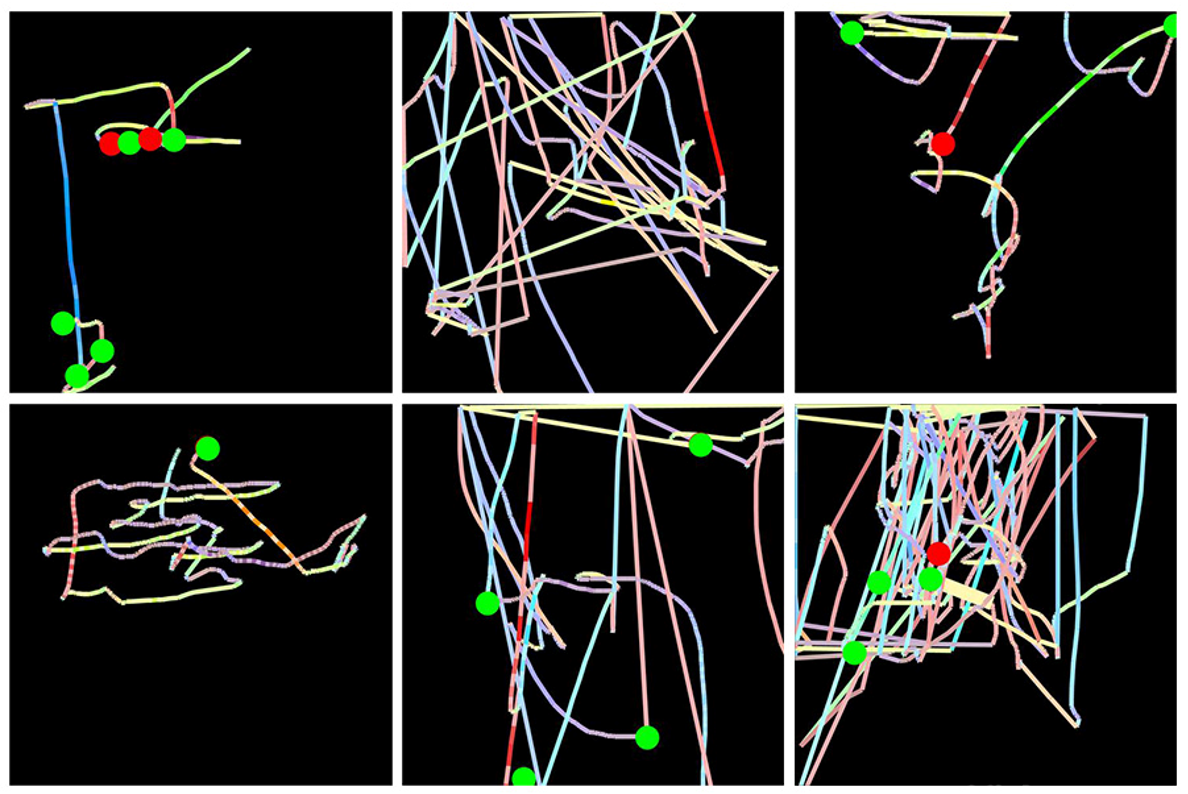
- Mahmoud Kalash et al. converted malware binary files into grayscale images for classification, achieving superior results compared to previous methods. [link to paper](https://www.researchgate.net/publication/338310287_A_Deep_Learning_Framework_for_Malware_Classification)
    - 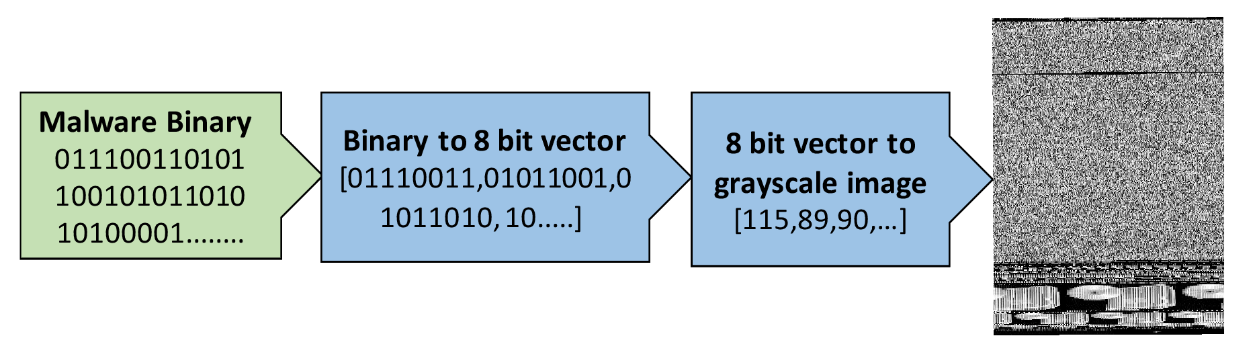
    - 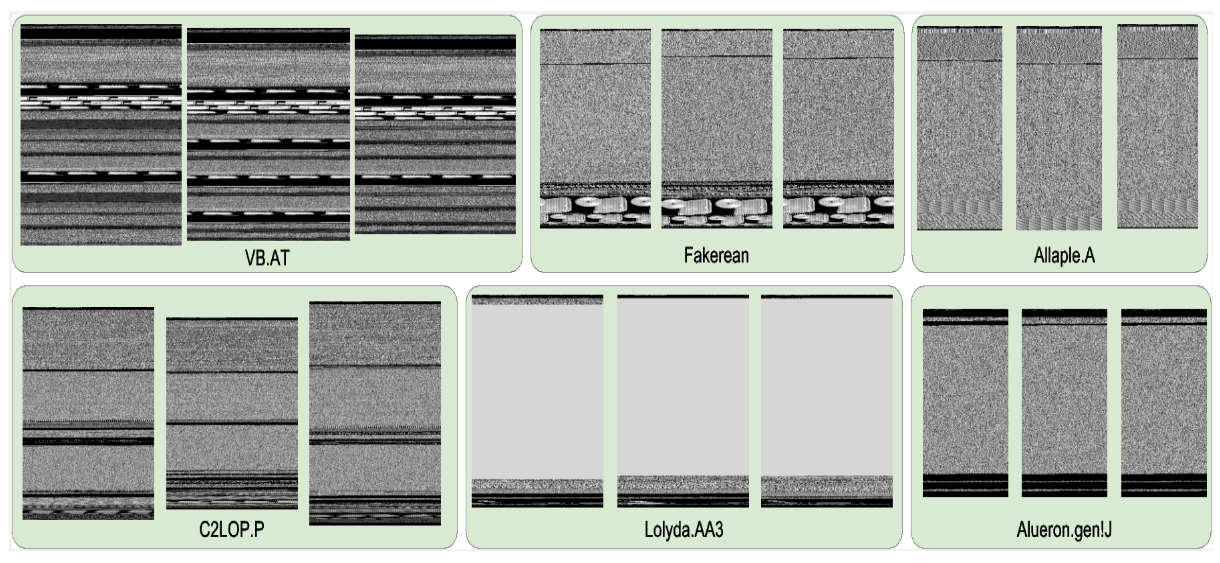
- Human-eye recognizable image categories often lead to successful deep learning model classifications.
- Creative data representation approaches like these can outperform traditional methods, suggesting their effectiveness in problem domains.


### Deep Learning Vocabulary

- **Label:** The data that we're trying to predict, such as "dog" or "cat".
- **Architecture:** The template of the model that we're trying to fit; the actual mathematical function that we're passing the input data and parameters to.
- **Model:** The combination of the architecture with a particular set of parameters.
- **Parameters:** The values in the model that change what task it can do, and are updated through model training.
- **Fit (Train):** Update the parameters of the model such that the predictions of the model using the input data match the target labels.
- **Pretrained model:** A model that has already been trained, generally using a large dataset, and will be fine-tuned.
- **Fine-tune:** Update a pretrained model for a different task.
- **Epoch:** One complete pass through the input data.
- **Loss:** A measure of how good the model is, chosen to drive training via SGD (Stochastic Gradient Descent).
- **Metric:** A measurement of how good the model is, using the validation set, chosen for human consumption.
- **Validation set:** A set of data held out from training, used only for measuring how good the model is.
- **Training set:** The data used for fitting the model; does not include any data from the validation set.
- **Overfitting:** Training a model in such a way that it remembers specific features of the input data, rather than generalizing well to data not seen during training.
- **CNN (Convolutional Neural Network):** A type of neural network that works particularly well for computer vision tasks.
---
**The bigger picture:**

- **Machine Learning:**
  - Discipline where a program is defined by learning from data.
- **Deep Learning:**
  - Specialty within machine learning using neural networks with multiple layers.
- **Image Classification:**
  - Example task within deep learning; predicting labels for images.
- **Model Creation:**
  - Starts with choosing an architecture, a general template.
  - Training process involves finding parameter values specialized for data.
- **Loss Function:**
  - Determines the goodness or badness of a prediction.
- **Pretrained Model:**
  - Already trained on existing data, can be adapted to new data via fine-tuning.
- **Generalization:**
  - Ensuring the model learns general lessons from data, applicable to new items.
  - Overfitting risk: model memorizes seen data, performs poorly on new data.
- **Validation Set:**
  - Data subset used to evaluate model performance during training.
- **Metric:**
  - Assessment tool for overall model performance on validation set.
- **Epoch:**
  - One complete pass through the training data during model training.
- **Deep Learning's Distinction:**
  - Relies on architectures based on neural networks.
  - Convolutional Neural Networks (CNNs) are crucial for tasks like image classification.


### Deep Learning for Image Segmentation

- Deep learning's effectiveness for image classification has been widely discussed, showing superhuman results even in complex tasks like recognizing malignant tumors in CT scans.

- However, it extends beyond classification. One critical application is localizing objects in images, crucial for autonomous vehicles.

- Segmentation, the process of recognizing the content of each pixel in an image, is essential for tasks like object localization.

- **Training a Segmentation Model with fastai:**
  - Utilize a subset of the Camvid dataset from the paper "Semantic Object Classes in Video: A High-Definition Ground Truth Database" by Gabruel J. Brostow, Julien Fauqueur, and Roberto Cipolla.
  - The goal is to train a model capable of accurately classifying each pixel in an image.


In [4]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

- **Visualization of Model Performance:**
  - Assess the model's performance by color-coding each pixel of an image.
  - Comparing ground truth labels with model predictions reveals the model's effectiveness in segmenting objects.
  - Notable achievements include consistent color-coding of cars and trees, indicating precise segmentation.

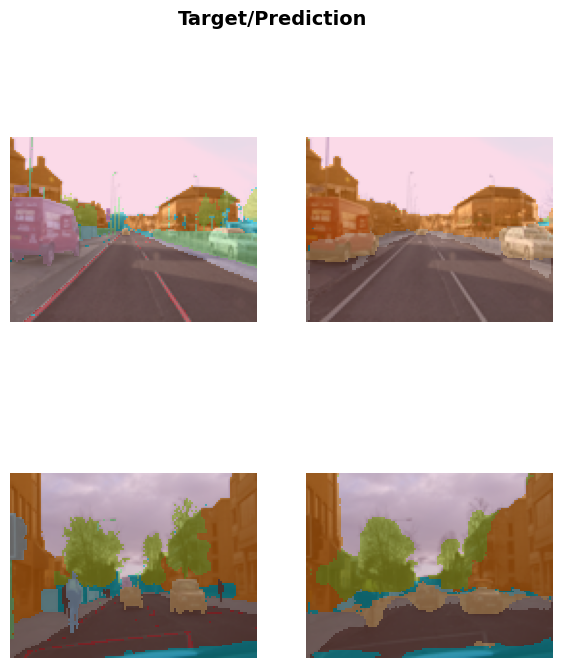

In [6]:
learn.show_results(max_n=2, figsize=(7,8))

### Natural Language Processing (NLP) Advancements

- **Text Generation:** Computers can generate text autonomously.
- **Language Translation:** Automatic translation between languages is possible.
- **Sentiment Analysis:** Analyzing comments and classifying sentiment (positive, negative, neutral).
- **Word Labeling:** Labeling words in sentences for various tasks.

**Code Example:** Training a sentiment classification model:

In [5]:
from fastai.text.all import *

path= untar_data(URLs.IMDB)
dls = TextDataLoaders.from_folder(path, valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

KeyboardInterrupt: 

```markdown
## Handling "CUDA out of memory error"

- If encountering a "CUDA out of memory error" after running the provided cell:
  - Click on the menu Kernel, then select Restart.
  - Instead of executing the previous cell, copy and paste the following code:

```python
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

- To mitigate the error, the batch size is reduced to 32.
  - If the error persists, consider changing the batch size to 16.

## Model Description

- **Dataset:** IMDb Large Movie Review dataset from the paper "Learning Word Vectors for Sentiment Analysis" by Andrew Maas et al.
- **Model Type:** Text classifier using AWD-LSTM architecture.
- **Training:** The model is trained on movie reviews, handling texts of varying lengths.
- **Prediction Example:**

```python
learn.predict("I really liked that movie!")
```

- **Output:** ('neg', tensor(0), tensor([0.8786, 0.1214]))
  - The review is considered positive.
  - The second part denotes the index of "pos" in the data vocabulary.
  - Probabilities: 99.6% for "pos" and 0.4% for "neg".
```

In [6]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

KeyboardInterrupt: 

### Tabular Data Modeling with fastai

- **Tabular Data:** Data that is in the form of a table, such as from a spreadsheet, database, or CSV file. A tabular model predicts one column of a table based on information in other columns.
- **Dataset:**
  - We use the Adult dataset from the paper "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid" by Rob Kohavi.
  - The dataset contains demographic data about individuals (education, marital status, race, sex, etc.) and their annual income.

In [7]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)


- **Model Training:**
  - We train a model to predict whether a person is a high-income earner based on their socioeconomic background.
  - We specify categorical columns (containing discrete choices) and continuous columns (containing numerical quantities) to fastai.

- **Pretrained Models:** Not available for tabular modeling tasks in general. Transfer learning is not commonly used for this purpose.

- **Training Method:**
  - We use `fit_one_cycle`, the most commonly used method for training fastai models from scratch (without transfer learning).


In [8]:
learn.fit_one_cycle(3)

- **Performance:**
  - The model achieves over 80% accuracy.
  - Training time is around 30 seconds.

### Training a Movie Recommendation Model with fastai

- **Model Objective:** Predict movie ratings on a scale of 0.5 to 5.0 with an average error of around 0.6.
- **Target Range Specification:** Utilize the `y_range` parameter in fastai to specify the range of the target variable, as we're predicting a continuous number.

- **Fine-tuning Approach:** Although not using a pretrained model, fastai allows the use of `fine_tune` for training, even when not utilizing a pretrained model. This flexibility enables experimentation with different training strategies.
  - Note: Further understanding of this approach is covered in <<chapter_pet_breeds>>.

- **Experimentation with Training Strategies:** Evaluate the effectiveness of `fine_tune` versus `fit_one_cycle` for the specific dataset, as the optimal approach may vary depending on the dataset characteristics.

- **Result Visualization:** Utilize the `show_results` function to examine user and movie IDs, actual ratings, and model predictions.


In [9]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

In [10]:
learn.show_results()

## Validation Sets and Test Sets

- **Purpose of Validation Set:**
  - Splitting data into training and validation sets helps evaluate model generalization to unseen data.
  - Prevents model from "cheating" by ensuring it learns characteristics rather than memorizing specific examples.

- **Introduction of Test Set:**
  - Test set acts as a further level of reserved data, kept even from modelers themselves.
  - Used only for final evaluation, ensuring unbiased assessment of model performance.

- **Hierarchy of Data Cuts:**
  - Training data: Fully exposed to model during training.
  - Validation data: Less exposed, used for hyperparameter tuning.
  - Test data: Totally hidden, only used for final model evaluation.

- **Size and Representation of Validation/Test Sets:**
  - Validation and test sets should have enough data for accurate assessment.
  - Representative of future data to ensure model's applicability.
  - Judgment needed in defining sets, especially in cases like time series data.

- **Importance in Decision Making:**
  - Critical for ensuring model performance and intellectual honesty.
  - Helps mitigate risks when hiring third-party modelers.
  - Avoids failures in AI adoption by understanding the importance of validation and test sets.

- **Use Judgment in Defining Test Sets:**
  - Consider more than random sampling for defining validation and test sets.
  - Representative sets are essential for accurate model evaluation.


- **[Kaggle Time Series Competition Example](https://www.kaggle.com/c/favorita-grocery-sales-forecasting)**
  - Kaggle organized a competition to predict sales in Ecuadorian grocery stores.
  - Training data: Jan 1, 2013, to Aug 15, 2017; Test data: Aug 16, 2017, to Aug 31, 2017.
  - Ensured predictions were made for future periods relative to the model's perspective, similar to quant hedge fund back-testing.

- **Anticipating Data Differences**
  - Consider the [Kaggle distracted driver competition](https://www.kaggle.com/c/state-farm-distracted-driver-detection).
  - Independent variables: pictures of drivers; dependent variables: categories like texting, eating, or looking ahead.
  - Test data includes images of drivers not seen in training to assess model generalization.
  - Important for an insurance company as the model should perform well on new drivers.
    - **Overfitting Considerations**
      - Training set may include pictures of the same drivers in different positions.
      - Using familiar drivers in validation may lead to overestimation of model performance.
      - Validation set should include diverse individuals to prevent overfitting to specific characteristics.

- **[Kaggle Fisheries Competition](https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring)**
  - Aimed to identify fish species caught by fishing boats to prevent illegal fishing.
  - Test set comprised boats not seen in training, requiring validation set inclusion of new boats.

- **Uncertain Validation Data Differences**
  - In problems using satellite imagery, validation data may differ geographically from the training set.
  - Need more information to determine if training data covers specific locations or is geographically scattered.
